# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO: Antonio Gabriel Araújo Silva__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

De iníco, para contextualizar, despesas médicas são uma das principais despesas no dia a dia da vida humana. Muitos fatores contribuem para a evolução destes gastos, estilos de vidas e parâmetros físicos podem trazer doenças e enfermidades que causam esses aumentos em planos de saúde. A partir disso, técnicas como predição de dados utilizando regressão linear são bem-vindas para, por exemplo, que se possa prever o custo do seguro de saúde com base nos fatores que o influenciam.

No presente trabalho será apresentado como se utilizar regressão linear para prever dados da saúde, começando pelo o que é regressão linear, em seguida sua aplicabilidade na previsão de dados, como resolvela pelo método dos mínimos quadrados, e 2 possíveis abordagens para mínimos quadrados sendo estas:
a solução ingênua e fatoração cholesky.

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

In [1]:
from IPython.display import Image

Seja um conjunto dados de relação x e y, em que apresentem linearidade, é de interesse encontrar uma equação, reta ou modelo linear que represente o comportamento desses dados disperssos, a fim de que se possa fazer predições sobre dados diferentes e semelhantes aos que estão no conjunto de dados original.

O GIF abaixo ajuda a entender o que é regressão linar, já que, podemos definir como: 
> Regressão linear é o processo de traçar uma reta através dos dados em um diagrama de dispersão. A reta resume esses dados, o que é útil quando fazemos previsões.

In [2]:
Image(url='https://miro.medium.com/max/1400/1*iiXz6nV4IQFhJ8uAk2yTnw.gif', width=700)

Regressão Linear é uma técnica matemática que visa encontrar a equação que fornece uma relação linear, ou seja, a equação da linha da reta entre duas variáveis, como uma função de primeiro grau do seguinte formato.  
$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i $$  
$y_i$ é a variável dependente, a qual se deseja realizar as predições  
$x_i$ é a variável independente, que é a caracteristica observada que influencia na predição  
$\beta_0$ é o valor que intercepta $y$  
$\beta_i$ é o coeficiente de $x_i$ que determina o quanto $x_i$ vai influenciar na predição.

$\epsilon_i$ é o erro (diferença) entre cada valor de $y_i$ no Diagrama de Dispersão e o valor $\hat{y}$ estimado pela reta de regressão linear, $\epsilon_i$ também é chamado de erro aleatório, pois captura os efeitos decorrentes de todas as variáveis que não foram incluídas no modelo..

O modelo se torna probabilistico devido o erro aleatório da equação, por isso o que se faz na prática é encontrar apenas um estimação desse modelo linear:  
$$ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i + \epsilon_i $$  

Na regressão linear símples representada pela equação acima em que só há uma variável independente, iremos encontrar uma estimação para os valores dos coeficientes $\beta_0$ e $\beta_1$. Dessa forma ao nos depararmos com novos valores $x_i$ semelhantes ao originais, poderemos utilizar nossas estimaçãos $\hat{\beta_0}$ e $\hat{\beta_1}$ para prever os valores estimados $\hat{y_i}$

Na equação acima pode se ter mais de uma variável independente $x_i$ cada uma com seu respectivo coeficiente $\beta_i$.  
gerando uma regressão linear multipla do seguinte formato:

$$ y_i = \hat{\beta}_0 + \hat{\beta}_1x_{1i} + ... + \hat{\beta}_kx_{ki} + \epsilon_i $$ em que há k > 1 variáveis independentes, onde iremos encontrar uma estimação para os valores dos k coeficientes $\beta$. Dessa forma ao nos depararmos com novos k valores $x_i$ semelhantes aos originais, poderemos utilizar nossas k estimaçãos $\hat{\beta}$ para prever os valores estimados $\hat{y_i}$

Podemos transforma a equação de regressão linear multipla para forma matricial, de tal forma que quando obtermos as estimativas $\hat{\beta}$, $Y = X . \hat{\beta}$ seram nossas predições, como mostrado na imagem abaixo:

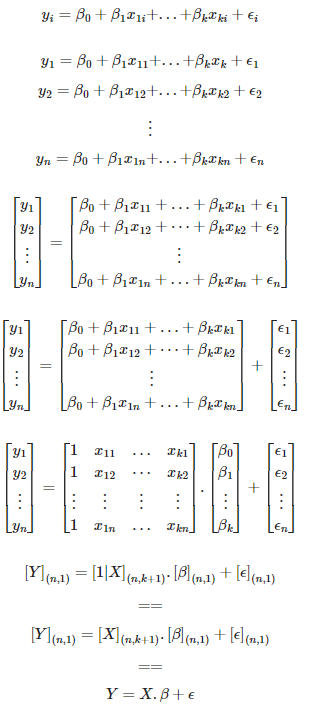

<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

Para estimar os valores da matriz de coeficientes $\begin{bmatrix} \beta \end{bmatrix}_{(n,1)}$ da equação matricial da regressão linear multipla matricial $Y = X . \beta + \epsilon$, utilizaremos o método dos mínimos quadrados.  

Mínimos quadrados procura estimar os melhores valores $\hat{\beta}$ a fim de minimizar 
$$ \sum_{i=1}^{n} (\epsilon_i)^2 = \epsilon_1^2 + ... + \epsilon_n^2 $$

### Solução Ingênua

Sendo $Y = X \beta$ um sistema matricial super determinado  
multiplicamos os dois lados da equação por $X^t$ obtemos o seguinte sistema de equações normais
$$X^t Y = X^t X \beta$$ 
Isolando o $\beta$ na equação temos
$$ \beta = (X^TX)^{-1}X^T Y $$
Onde $(X^TX)^{-1}X^T$ é a matriz chamada de pseudo inverssa de $X$


Para minimizar isso $ \sum_{i=1}^{n} (\epsilon_i)^2 = \epsilon_1^2 + ... + \epsilon_n^2 $ existe a Solução Ingênua que estima os coeficientes $\hat{\beta}$ que minimizam:
$$ \big\vert\big\vert X\beta - Y \big\vert\big\vert_2$$

Ou seja, estamos interessados em onde o vetor $Y$ é mais aproximado do subespaço de todas as combinações lineares dos vetores coluna de $X$. Isto é a projeção de $Y$ em $X$. Já que $Y - X\hat{\beta}$ deve ser perpendicular ao subespaço de todas as combinações lineares dos vetores coluna de $X$.

Assim $$X^T (Y - X\hat{\beta}) = 0 $$ Usa-se $X^T$ para multiplicar cada coluna de $X$ por $Y - X\hat{\beta}$)  
que referência a *equação normal*:

$$ \beta = (X^TX)^{-1}X^T Y $$  
Que é a equção de aproximação (otimização) dos mínimos quadrados, que serve para encontrar os melhores coeficientes $\hat{\beta}$ da reta de regressão linear.

### Cholesky

Dada as equações normais:
$$X^t X \beta = X^t Y$$
Se $X$ tem todas a linhas e colunas linearmente independentes, a matriz pseudo inversa $(X^TX)^{-1}X^T$ é quadrada, hermidiana, simétrica e positiva-definida. A maneira padrão de se trabalhar com essa matrix é fatoração de Cholesky em $X^TX$, que encontra um matriz triangular superior $R$ de forma que.
$$X^TX = R^TR$$

Aplicando nas equações normais:
$$R^t R \beta = X^t Y$$
Que se resolve da seguinte maneira
$$R^t W = X^t Y$$
$$R \beta = W$$

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

# Imports


In [3]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
import scipy as sp, numpy as np, math

## Medidas de erro

In [4]:
def regr_metrics(act, pred):
    return (math.sqrt(metrics.mean_squared_error(act, pred)), metrics.mean_absolute_error(act, pred))

Medidas para avaliar o quão bom um certo modelo de regressão linear prevê os valores. 

O parâmetro **act** da função declarada acima são os dados corretos esperados com a melhor aproximação, já **pred** são os dados obtidos do nosso modelo linear  
return (L2, L1) == (média dos quadrados dos erros, média dos módulos dos erros),sendo **n** a quantidade de elementos em act e pred  
$$L2 = \frac{\sum_{i=0}^{n - 1} (act_i - pred_i)^2}{n}$$
$$L1 = \frac{\sum_{i=0}^{n - 1} abs(act_i - pred_i)}{n}$$  
Quanto melhor as predições do modelo de regressão linear, menor serão os erros (L2, L1).

#Dados

Vai ser utilizado um dicionário de dados (sendo nomeado de data_diabetes) de pacientes com diabetes, onde são 442 amostras com 10 caracteríticas fisíológicas dos pacientes (features, são as variáveis independentes), as características fisiológicas são:  

> age, sex, bmi, bp, s1, s2, s3, s4, s5, s6  

Idade, sexo, IMC, pressão sanguínea, seis medições de soro sanguíneo. 
**target** é uma medida quantitativa da progressão da diabetes após um ano, que é o alvo das predições dos modelos de regressão linear, ou seja é a variável dependente.

Então:

In [5]:
data_diabetes = datasets.load_diabetes()

A seguir, é possível extrair um valor data de data_diabetes, em que esse valor é a matrix em que as linhas comrrespondem as 442 amostragens com as 10 colunas correspondete as features, variáveis independentes. 

Adiante, data.target é uma medida quantitativa da progressão da diabetes após um ano, que é o alvo da regressão linear, é a variável dependente.    
**train_test_split**, apartir de data.data e data.target, vai gerar um conjunto de dados para treino (trn, y_trn) que seram utilizados encontrar o modelo de regressão linear, e outro conjunto de dados para teste (test, y_test) que seram utilizados para testar o modelo de regressão linear encontrado.  

Os valores dos conjuntos de teste e de treino seram gerados de forma aleatória de acordo com test_size=0.2 que representa a proporção do conjunto de dados que sera incluída no conjunto de dados para teste.

As matrizes X de variáveis dependentes devem ser concatenadas a uma coluna de ums com como visto em
$$
\begin{bmatrix} Y \end{bmatrix}_{(n,1)} = \begin{matrix} [1|X] \end{matrix}_{(n,k+1)} . \begin{bmatrix} \beta \end{bmatrix}_{(n,1)} + \begin{bmatrix} \epsilon \end{bmatrix}_{(n,1)}
$$

Então:

In [6]:
trn,test,y_trn,y_test = train_test_split(data_diabetes.data, data_diabetes.target, test_size=0.2)

trn_int = np.c_[np.ones(trn.shape[0]), trn]
test_int = np.c_[np.ones(test.shape[0]), test]

trn_int é concatenação de uma coluna de ums a matriz trn.  
tst_int é concatenação de uma coluna de ums a matriz test.  

## Sklearn solution

Iniciar criando um objeto para regressão linear baseada no método dos mínimos quadrados:

In [7]:
regr = linear_model.LinearRegression()

Depois, encontrar o modelo de regressão linear a partir dos dados de treino

In [8]:
regr.fit(trn, y_trn)

LinearRegression()

Em seguida, previsões do modelo de regressão linear da biblioteca sklearn quando alimentado por test:

In [9]:
pred = regr.predict(test)

Abaixo, o quão bom foram as previsões do modelo da bliblioteca sklearn, que serviram de referência para nossa implementação.

In [10]:
sklearn_errors = regr_metrics(y_test, pred)
sklearn_errors

(57.071417998069364, 47.553886168264405)

## Solução Ingênua

### Funções

In [11]:
def lr_naive(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

X.T é a matriz transposta de X  
@ é o produto de matrizes  
np.linalg.inv(Xn) é a matriz inversa (Xn)^-1 da matrix Xn, onde Xn @ np.linalg.inv(Xn) = In que é a matrix identidade  
rl_naive(X, Y) corresponde a:  
$$ \beta = (X^TX)^{-1}X^T Y $$
Em que corresponde aos coeficientes $\hat{\beta}$ dos termos independentes da equação da reta da regressão linear

Abaixo temos os coeficientes $\hat{\beta}$ dos termos independentes da equação da reta da regressão linear

In [12]:
coeffs_naive = lr_naive(trn_int, y_trn)

Previsões do modelo de regressão linear $$Y = X . \hat{\beta}$$

In [13]:
pred = test_int @ coeffs_naive

A medida de erro na implementação abaixo é semelhante ao erro do método utilizado na biblioteca do sklearn, o que indica implementação correta

In [14]:
lr_naive_errors = regr_metrics(y_test, pred)
print(lr_naive_errors, "-> lr_naive")
print(sklearn_errors, "-> sklearn")

(57.07141799806935, 47.5538861682644) -> lr_naive
(57.071417998069364, 47.553886168264405) -> sklearn


## Cholesky

### Funções

In [15]:
def lr_chol(X, Y):
    R = sp.linalg.cholesky(X.T @ X)
    W = sp.linalg.solve_triangular(R, X.T @ Y, trans='T')
    return sp.linalg.solve_triangular(R, W)

R = sp.linalg.cholesky(X.T @ X)  
aplicando a decomposição cholesky em $X^TX$ que resulta na matriz superior $R$

W = sp.linalg.solve_triangular(R, X.T @ Y, trans='T')  
resolvendo o sistema $R^t W = X^t Y$ que retorna o valores de $W$

return sp.linalg.solve_triangular(R, W)  
Resolvendo o sistema $R \beta = W$ que que retorna os valores estima dos de $\hat{\beta}$

In [16]:
coeffs_chol = lr_chol(trn_int, y_trn)

São os coeficientes $\hat{\beta}$ dos termos independentes da equação da reta da regressão linear

In [17]:
pred = test_int @ coeffs_chol

Previsões do modelo de regressão linear $$Y = X . \hat{\beta}$$

In [18]:
lr_chol_errors = regr_metrics(y_test, pred)

print(lr_chol_errors, "-> lr_chol")
print(sklearn_errors, "-> sklearn")

(57.07141799806938, 47.55388616826442) -> lr_chol
(57.071417998069364, 47.553886168264405) -> sklearn


A medida de erro nesta implementação é semelhante ao erro do método utilizado na biblioteca do sklearn, o que indica implementação correta

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

O valor abaixo (chamado de data) é um dicionário de dados com preços de casas de boston e 13 caracteríticas dessas casas, data tem 506 amostras, em que data.target são as amostras de preço das casas que é o nosso alvo das previsões do modelo de regressão linear, data.data são as 13 caracteríticas das casas também com 506 amostras.
As caracteríticas são:   
>  CRIM per capita crime rate by town  
ZN proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS proportion of non-retail business acres per town  
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX nitric oxides concentration (parts per 10 million)  
RM average number of rooms per dwelling  
AGE proportion of owner-occupied units built prior to 1940  
DIS weighted distances to five Boston employment centres  
RAD index of accessibility to radial highways  
TAX full-value property-tax rate per \$10,000  
PTRATIO pupil-teacher ratio by town  
B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town  
LSTAT % lower status of the population  
MEDV Median value of owner-occupied homes in \$1000’s 


In [19]:
trn_int = np.c_[np.ones(trn.shape[0]), trn]
test_int = np.c_[np.ones(test.shape[0]), test]

In [20]:
regr.fit(trn, y_trn)
regr_metrics(y_test, regr.predict(test))

(57.071417998069364, 47.553886168264405)

In [21]:
regr_metrics(y_test, test_int @ lr_naive(trn_int, y_trn))

(57.07141799806935, 47.5538861682644)

In [22]:
regr_metrics(y_test, test_int @ lr_chol(trn_int, y_trn))

(57.07141799806938, 47.55388616826442)